In [196]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from io import StringIO

In [78]:
dados = pd.read_csv(r"C:\Users\Gustavo1\Documents\Programming_codes\POS-ALURA\FASE 1\A1-analise-exploracao-dados\bases\A150850189_28_143_208.csv", encoding="utf-8-sig",
            skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")

pd.set_option('display.float_format','{:.2f}'.format)
#pd.get_option('float_format', "{:.2f}".format())

In [79]:
#dados['2021/Set'].mean(numeric_only=True)
dados = dados.rename({dados.columns[0]:'UF'}, axis='columns')
dados.head

<bound method NDFrame.head of                         UF  1992/Mar  1992/Abr  1993/Mai  1993/Dez  1994/Jan  \
0              11 Rondônia         -         -         -         -         -   
1                  12 Acre         -         -         -         -         -   
2              13 Amazonas         -         -         -         -         -   
3               14 Roraima         -         -         -         -         -   
4                  15 Pará         -         -         -         -         -   
5                 16 Amapá         -         -         -         -         -   
6             17 Tocantins         -         -         -         -         -   
7              21 Maranhão         -         -         -         -         -   
8                 22 Piauí         -         -         -         -         -   
9                 23 Ceará         -         -         -         -         -   
10  24 Rio Grande do Norte         -         -         -         -         -   
11        

<Axes: xlabel='UF'>

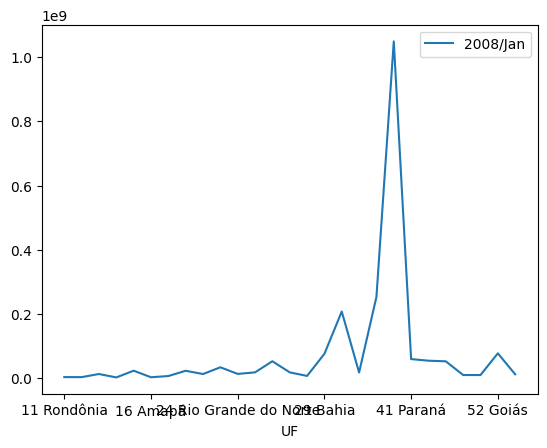

In [80]:
dados.plot(x='UF', y='2008/Jan')

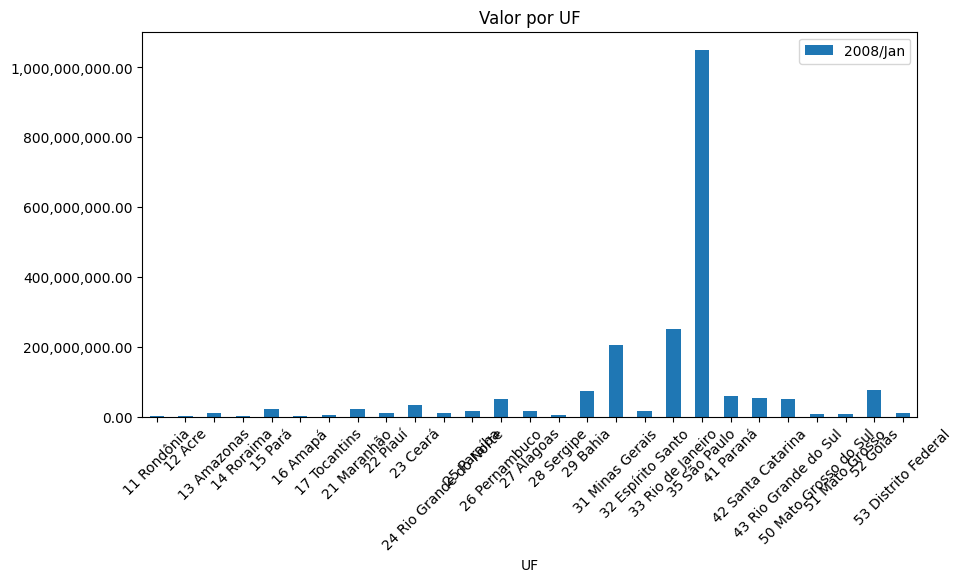

In [81]:
axis = dados.plot(x='UF', y='2008/Jan', kind='bar', figsize=(10,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor por UF")
plt.xticks(rotation= 45)
plt.show()

### Desafio 1: Executar o comando anterior com os dados mais recentes na base
### Desafio 2: Deixar as legendas ânguladas (45, 90, etc) para facilitar a leitura

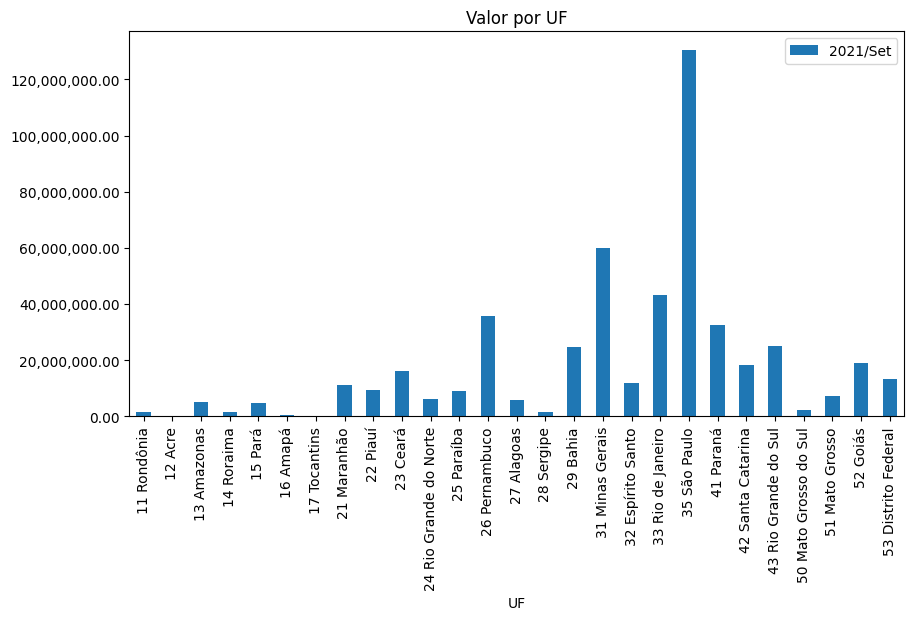

In [82]:
axis = dados.plot(x='UF', y='2021/Set', kind='bar', figsize=(10,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor por UF")
plt.show()

In [83]:
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [84]:
colunas_usaveis = dados.mean(numeric_only=True).index.tolist()
colunas_usaveis.insert(0, 'UF')
colunas_usaveis[:5]

['UF', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']

In [85]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

,UF,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1682801.60,1088059702.25
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,0.00,475290315.34
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,5292323.36,2061943006.93
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,1496814.75,352546288.71
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4620263.03,4968811817.17


In [86]:
dados_usaveis = dados_usaveis.set_index('UF')
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
UF,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1682801.60,1088059702.25
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,0.00,475290315.34
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,5292323.36,2061943006.93
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,1496814.75,352546288.71
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4620263.03,4968811817.17


In [87]:
dados_usaveis['2009/Ago'].head()

UF
11 Rondônia    3787323.26
12 Acre        1714707.91
13 Amazonas    9267006.58
14 Roraima     1529696.18
15 Pará       27892582.69
Name: 2009/Ago, dtype: float64

In [88]:
dados_usaveis.loc['12 Acre']

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Jun     3458187.11
2021/Jul     2302711.01
2021/Ago     1196754.85
2021/Set           0.00
Total      475290315.34
Name: 12 Acre, Length: 171, dtype: float64

In [89]:
dados_usaveis.iloc[1]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Jun     3458187.11
2021/Jul     2302711.01
2021/Ago     1196754.85
2021/Set           0.00
Total      475290315.34
Name: 12 Acre, Length: 171, dtype: float64

<Axes: xlabel='UF'>

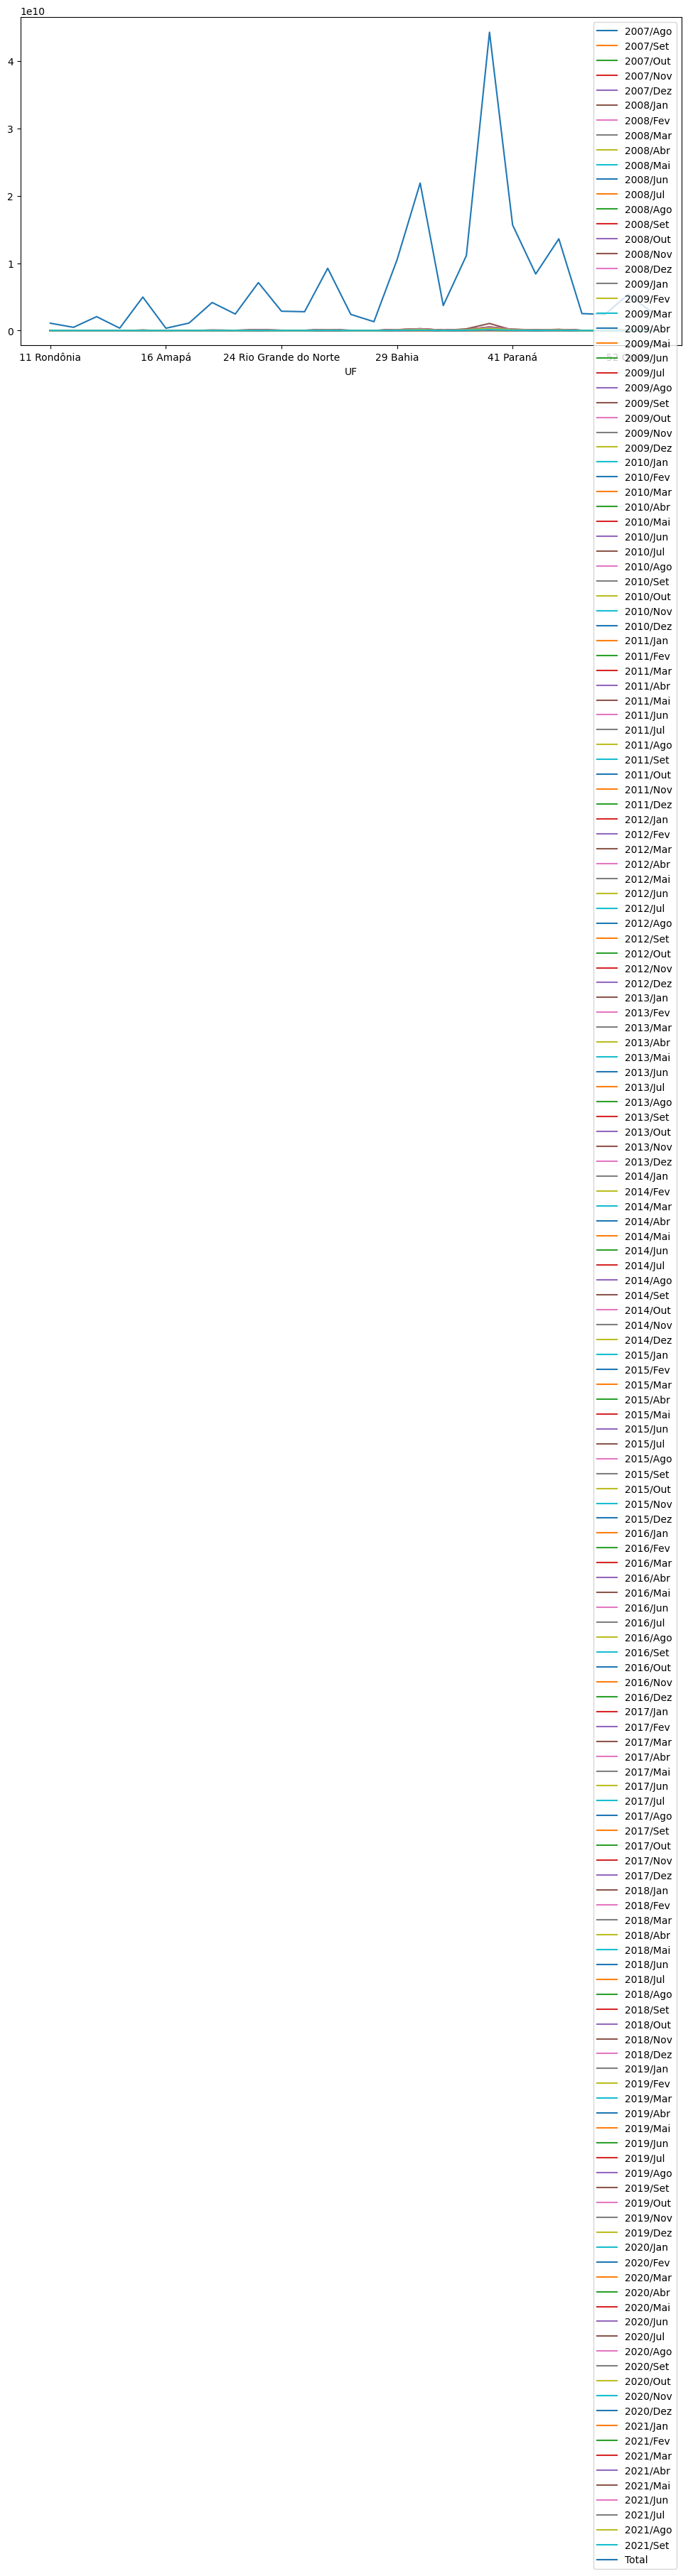

In [90]:
# Vai exibir um gráfico com uma legenda imensa, pois existe muitas colunas
dados_usaveis.plot(figsize=(12,6))

<Axes: >

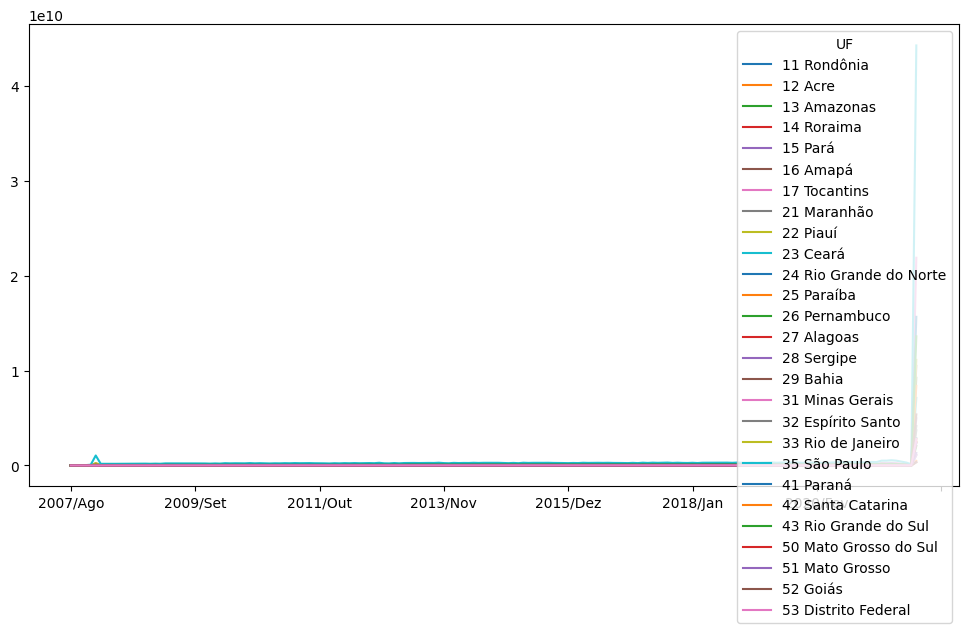

In [91]:
# O metodo " T ", transpoem as colunas e linhas, basicamente inverte as colunas com as linhas
dados_usaveis.T.plot(figsize=(12,6))

In [92]:
dados_usaveis = dados_usaveis.drop('Total', axis=1)
dados_usaveis.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
UF,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,120291289.00,115991861.17,126730284.94,169687680.33,145302546.19,155084262.06,142812283.70,112805351.92,74954589.62,25200345.68
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,25069724.67,24727004.66,25600761.42,32506184.09,33101059.57,36885633.11,31595196.27,20711974.43,11302985.98,2445267.12
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,19579997.79,18889711.53,21544594.04,35790837.70,37534015.20,37859473.58,34937134.14,29364200.76,19849249.43,7325067.61
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,76052094.77,18149374.27,20992213.03,21049477.30,19162546.79,...,41133178.65,42638703.48,45715467.93,74464062.86,68630407.92,69467332.76,67162348.93,57891285.60,44939821.34,18860370.17
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,22822625.40,24484716.93,24156062.77,36391034.41,35641761.42,32434557.27,27196457.00,26265515.44,22156437.60,13173812.37


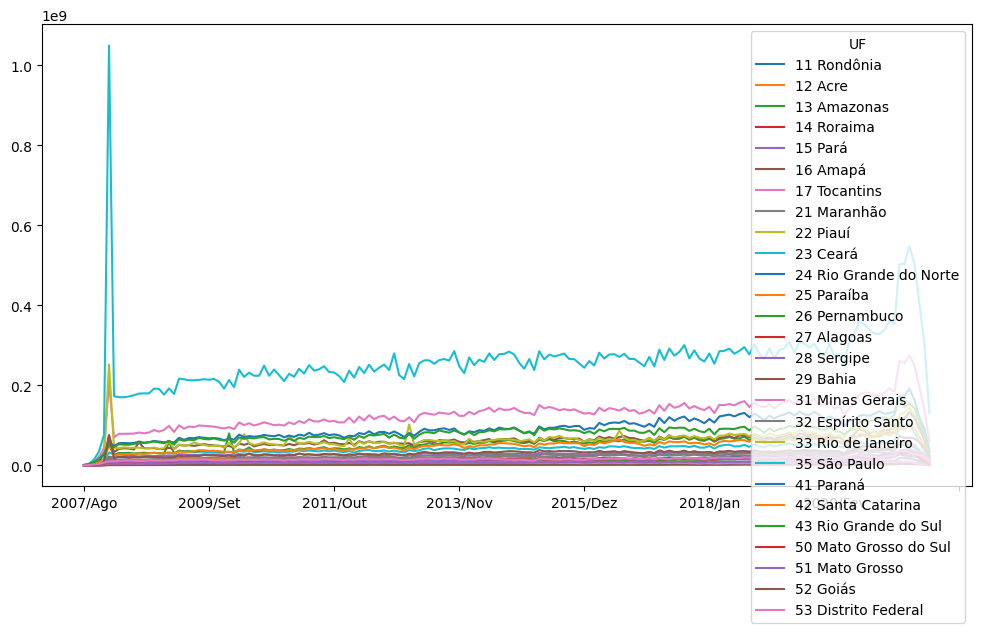

In [93]:
dados_usaveis.T.plot(figsize=(12,6))
plt.show()

### Desafio 3: reposicionar a legenda. Dentro? Fora? Onde?
### Desafio 4: Retocar o título da visualização
### Desafio 5: Adicionar títulos aos dois eixos

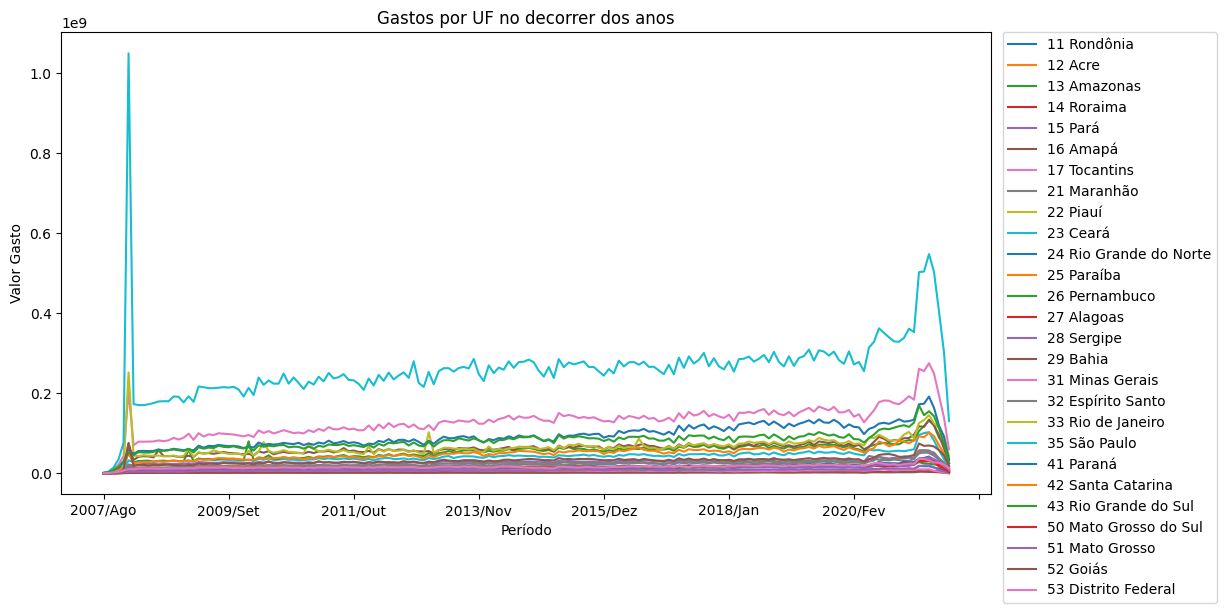

In [94]:
dados_usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.25, 1.015),loc='upper right') # Desafio 3
plt.title('Gastos por UF no decorrer dos anos') # Desafio 4
# Desafio 5
plt.xlabel('Período') 
plt.ylabel('Valor Gasto')
plt.show()

In [95]:
dados_usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='UF')

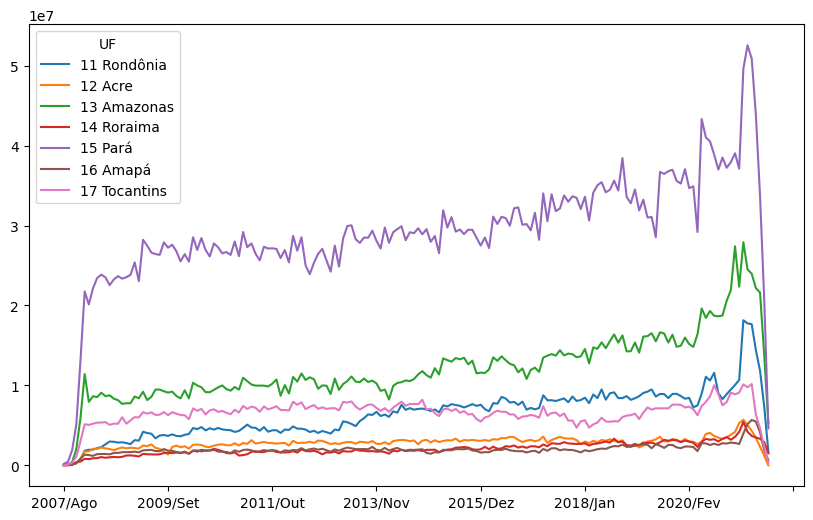

In [96]:
dados_usaveis[:7].T.plot(figsize=(10,6))
plt.show()

In [97]:
dados_usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
UF,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,120291289.00,115991861.17,126730284.94,169687680.33,145302546.19,155084262.06,142812283.70,112805351.92,74954589.62,25200345.68
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,32003703.63,31210354.69,35824653.31,54315704.28,51797774.60,55324683.42,51958573.27,37775425.78,25779674.83,11194657.20
27 Alagoas,104243.75,174024.90,595544.54,1125396.73,2564966.65,16623799.85,8112220.30,9210505.56,10466691.94,9844096.03,...,18566269.71,20154290.67,21539842.43,30875169.00,29413996.17,30550686.94,26888254.59,17475906.50,11393875.70,5714532.94
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1682801.60
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1049827695.26,173062308.33,170621304.31,170389849.75,172513744.39,...,338634303.39,361427087.80,352846447.86,502905607.53,504427182.45,548112705.83,503160959.54,404373175.61,301986341.98,130535317.64
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,29093489.77,27452425.03,28344652.94,37147348.21,38411419.09,41819897.10,34438169.58,24537062.07,16809169.29,6055806.12
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2841469.69,2786277.13,2664375.13,3960131.30,5153704.82,5672086.52,5469150.38,4136950.62,1875241.91,626751.41


<Axes: >

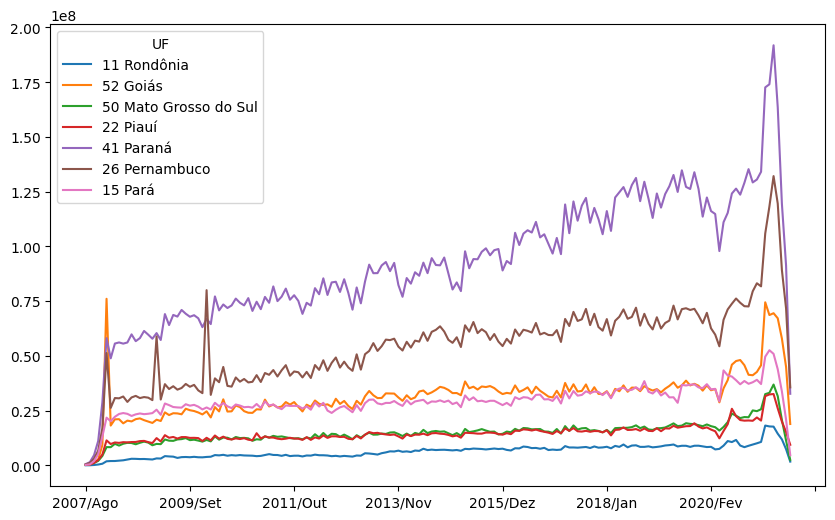

In [98]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [99]:
np.random.seed(42)
dados_usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
UF,,,,,,,,,,,,,,,,,,,,,
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,20331213.19,21839112.13,20414695.91,31586481.13,32367250.52,32550777.47,26015797.57,19972846.10,15220885.72,9371428.06
27 Alagoas,104243.75,174024.90,595544.54,1125396.73,2564966.65,16623799.85,8112220.30,9210505.56,10466691.94,9844096.03,...,18566269.71,20154290.67,21539842.43,30875169.00,29413996.17,30550686.94,26888254.59,17475906.50,11393875.70,5714532.94
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,55331920.85,57451589.31,60105521.76,96063868.02,100543749.33,102825954.51,81919446.05,57727138.38,35650007.47,16234603.93
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,79268003.38,75238574.26,82034122.92,92581408.31,89976929.76,101661537.37,93055772.86,70531971.21,48884998.15,18486461.58
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1682801.60
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,20704186.30,21740778.25,23328004.56,32197966.23,30904806.65,39602463.80,33149421.34,24925842.39,16167879.55,8962429.99
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206493861.30,70301089.50,79119005.51,79046322.41,79268070.12,...,181833354.32,192844182.05,183891512.07,261376726.91,255545757.83,275151838.35,249713866.70,194734136.81,139157823.59,60010941.33


<Axes: >

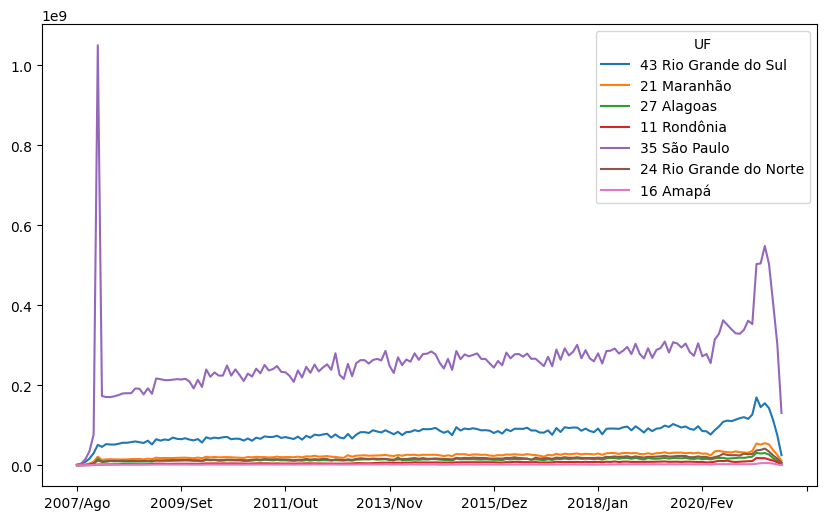

In [100]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [101]:
dados_usaveis['Total'] = dados_usaveis.sum(axis=1)
dados_usaveis = dados_usaveis.astype(float)
dados_usaveis = dados_usaveis/100000
dados_usaveis.dtypes
np.random.seed(42)
dados_usaveis.head(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
UF,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0.04,0.16,1.34,3.47,7.12,18.30,19.41,19.56,21.43,22.80,...,100.46,106.77,181.47,177.54,176.60,144.36,118.34,73.71,16.83,10880.59
12 Acre,0.10,0.14,0.86,3.01,7.70,17.32,17.44,20.57,20.58,22.27,...,41.76,52.83,57.00,50.02,43.27,34.58,23.03,11.97,0.00,4752.89
13 Amazonas,0.36,0.46,4.16,20.20,59.49,114.19,79.35,86.42,85.32,90.80,...,274.06,223.41,279.24,245.16,239.74,221.75,216.15,138.07,52.92,20619.40
14 Roraima,0.05,0.12,0.44,3.69,4.71,8.08,7.72,8.76,8.97,10.27,...,35.58,41.72,54.27,41.93,36.81,34.75,33.21,29.08,14.97,3525.46
15 Pará,1.81,4.33,18.93,51.05,131.63,217.62,201.26,221.49,234.37,238.61,...,390.42,371.13,496.25,525.58,509.07,438.77,337.18,208.38,46.20,49687.93


##### Desafio 6: Ordernar dataframe com base na coluna total, para que na primeira tenha a linha com maior gasto, e na última coluna com menor gasto (ordenação)
##### Desafio 7: adicionar uma coluna com a região de cada estado
##### Desafio 8: adicione seu estado nessa lista de 7 estados

In [102]:
# Concluir código do desafio 7
dados_usaveis['Região'] = None
for i in range(len(dados_usaveis.index)):
    #x = int(dados_usaveis.index[i][:2])
    if int(dados_usaveis.index[i][:2]) >= 11 and int(dados_usaveis.index[i][:2]) <= 16:
        dados_usaveis.iloc[[i][:2], -1] = 'Norte'
    elif int(dados_usaveis.index[i][:2]) >= 17 and int(dados_usaveis.index[i][:2]) <= 29:
        dados_usaveis.iloc[[i][:2], -1]  = 'Nordeste'
    elif int(dados_usaveis.index[i][:2]) >= 31 and int(dados_usaveis.index[i][:2]) <= 35:
        dados_usaveis.iloc[[i][:2], -1]  = 'Sudeste'
    elif int(dados_usaveis.index[i][:2]) >= 41 and int(dados_usaveis.index[i][:2]) <= 50:
        dados_usaveis.iloc[[i][:2], -1] = 'Sul'
    else:
        dados_usaveis.iloc[[i][:2], -1]  = 'Centro-Oeste'

dados_usaveis.iloc[:,-1]

UF
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                  Nordeste
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul              Sul
51 Mato Grosso            Centro-Oeste
52 Goiás              

In [103]:
np.random.seed(42)
dados_dos_7_estados = dados_usaveis.sample(7)

# Desafio 8
dados_dos_7_estados.loc[7] = dados_usaveis.loc['35 São Paulo']
dados_dos_7_estados = dados_dos_7_estados.rename(index={7:'35 São Paulo'})

# Desafio 6
dados_dos_7_estados.sort_values(by='Total', ascending=False)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total,Região
UF,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,16.65,44.34,145.77,350.32,766.69,10498.28,1730.62,1706.21,1703.90,1725.14,...,3528.46,5029.06,5044.27,5481.13,5031.61,4043.73,3019.86,1305.35,442809.15,Sudeste
31 Minas Gerais,9.71,28.62,100.18,217.30,434.30,2064.94,703.01,791.19,790.46,792.68,...,1838.92,2613.77,2555.46,2751.52,2497.14,1947.34,1391.58,600.11,218990.14,Sudeste
42 Santa Catarina,6.94,10.93,35.62,75.79,147.73,530.34,244.10,274.83,278.07,283.54,...,820.34,925.81,899.77,1016.62,930.56,705.32,488.85,184.86,83928.00,Sul
23 Ceará,3.58,5.72,18.65,51.32,107.98,324.44,276.43,300.85,313.76,311.90,...,601.06,960.64,1005.44,1028.26,819.19,577.27,356.50,162.35,71185.29,Nordeste
25 Paraíba,0.97,3.68,10.02,21.50,54.48,165.99,108.72,123.49,126.81,132.58,...,233.28,321.98,309.05,396.02,331.49,249.26,161.68,89.62,27966.50,Nordeste
22 Piauí,2.21,3.53,10.78,24.06,49.30,113.75,97.12,104.28,102.28,105.62,...,204.15,315.86,323.67,325.51,260.16,199.73,152.21,93.71,24504.95,Nordeste
27 Alagoas,1.04,1.74,5.96,11.25,25.65,166.24,81.12,92.11,104.67,98.44,...,215.40,308.75,294.14,305.51,268.88,174.76,113.94,57.15,23947.79,Nordeste
11 Rondônia,0.04,0.16,1.34,3.47,7.12,18.30,19.41,19.56,21.43,22.80,...,106.77,181.47,177.54,176.60,144.36,118.34,73.71,16.83,10880.59,Norte


In [104]:
ordenados_por_total = dados_dos_7_estados
ordenados_por_total = ordenados_por_total.drop('Total', axis=1)
ordenados_por_total

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Região
UF,,,,,,,,,,,,,,,,,,,,,
22 Piauí,2.21,3.53,10.78,24.06,49.30,113.75,97.12,104.28,102.28,105.62,...,218.39,204.15,315.86,323.67,325.51,260.16,199.73,152.21,93.71,Nordeste
27 Alagoas,1.04,1.74,5.96,11.25,25.65,166.24,81.12,92.11,104.67,98.44,...,201.54,215.40,308.75,294.14,305.51,268.88,174.76,113.94,57.15,Nordeste
23 Ceará,3.58,5.72,18.65,51.32,107.98,324.44,276.43,300.85,313.76,311.90,...,574.52,601.06,960.64,1005.44,1028.26,819.19,577.27,356.50,162.35,Nordeste
42 Santa Catarina,6.94,10.93,35.62,75.79,147.73,530.34,244.10,274.83,278.07,283.54,...,752.39,820.34,925.81,899.77,1016.62,930.56,705.32,488.85,184.86,Sul
11 Rondônia,0.04,0.16,1.34,3.47,7.12,18.30,19.41,19.56,21.43,22.80,...,100.46,106.77,181.47,177.54,176.60,144.36,118.34,73.71,16.83,Norte
25 Paraíba,0.97,3.68,10.02,21.50,54.48,165.99,108.72,123.49,126.81,132.58,...,217.41,233.28,321.98,309.05,396.02,331.49,249.26,161.68,89.62,Nordeste
31 Minas Gerais,9.71,28.62,100.18,217.30,434.30,2064.94,703.01,791.19,790.46,792.68,...,1928.44,1838.92,2613.77,2555.46,2751.52,2497.14,1947.34,1391.58,600.11,Sudeste
35 São Paulo,16.65,44.34,145.77,350.32,766.69,10498.28,1730.62,1706.21,1703.90,1725.14,...,3614.27,3528.46,5029.06,5044.27,5481.13,5031.61,4043.73,3019.86,1305.35,Sudeste


In [105]:
colunas_interessantes = ordenados_por_total.columns[6:]
ordenados_por_total = ordenados_por_total[colunas_interessantes]
ordenados_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Região
UF,,,,,,,,,,,,,,,,,,,,,
22 Piauí,97.12,104.28,102.28,105.62,104.65,106.18,106.46,110.38,111.43,105.83,...,218.39,204.15,315.86,323.67,325.51,260.16,199.73,152.21,93.71,Nordeste
27 Alagoas,81.12,92.11,104.67,98.44,103.09,93.85,92.63,92.28,94.65,95.79,...,201.54,215.40,308.75,294.14,305.51,268.88,174.76,113.94,57.15,Nordeste
23 Ceará,276.43,300.85,313.76,311.90,294.64,303.03,293.05,304.35,317.41,304.16,...,574.52,601.06,960.64,1005.44,1028.26,819.19,577.27,356.50,162.35,Nordeste
42 Santa Catarina,244.10,274.83,278.07,283.54,289.93,300.49,288.88,307.26,312.74,299.99,...,752.39,820.34,925.81,899.77,1016.62,930.56,705.32,488.85,184.86,Sul
11 Rondônia,19.41,19.56,21.43,22.80,26.25,29.73,29.38,28.44,28.78,27.80,...,100.46,106.77,181.47,177.54,176.60,144.36,118.34,73.71,16.83,Norte
25 Paraíba,108.72,123.49,126.81,132.58,122.47,130.91,126.74,127.91,127.28,124.58,...,217.41,233.28,321.98,309.05,396.02,331.49,249.26,161.68,89.62,Nordeste
31 Minas Gerais,703.01,791.19,790.46,792.68,796.28,822.17,803.74,824.17,886.13,844.87,...,1928.44,1838.92,2613.77,2555.46,2751.52,2497.14,1947.34,1391.58,600.11,Sudeste
35 São Paulo,1730.62,1706.21,1703.90,1725.14,1755.58,1796.09,1800.97,1802.12,1919.99,1912.58,...,3614.27,3528.46,5029.06,5044.27,5481.13,5031.61,4043.73,3019.86,1305.35,Sudeste


In [106]:
#ordenados_por_total.T = ordenados_por_total.T.astype(float)
ordenados_por_total.T

<Axes: >

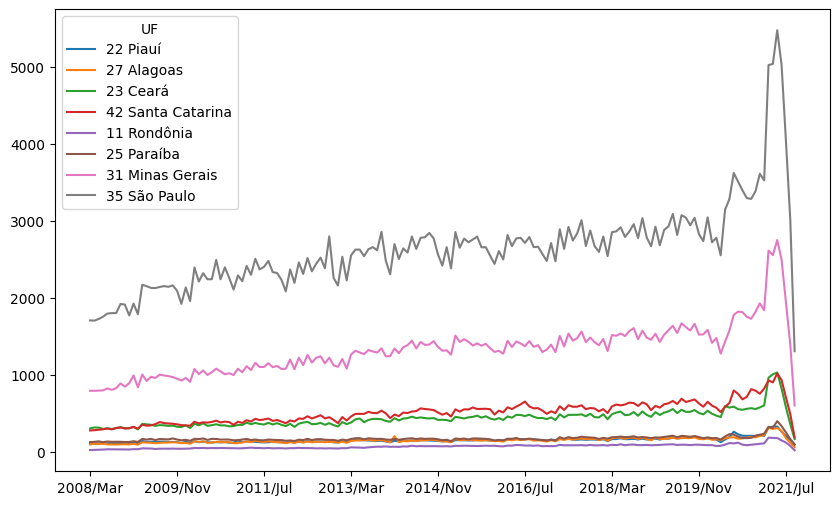

In [107]:
ordenados_por_total.T.iloc[1:-1,:].plot(figsize=(10,6))

##### Desafio 9: Formatar o gráfico (titulo, legenda, eixos, rotulos, valores)
##### Desafio 10: Pesquisar a função sort_index
##### Desafio 11: Pesquisar os casos de dengue no Brasil e verificar se existe algum padrão com os gastos encontrados aqui
##### Desafio 12: Plotar apenas os dados de uma região do brasil

In [108]:
np.random.seed(42)
ordenados_por_total.iloc[:,:-2] = ordenados_por_total.iloc[:,:-2].astype(float)
#ordenados_por_total = ordenados_por_total/100000
ordenados_por_total.dtypes
#ordenados_por_total.T.iloc[:5].plot(figsize=(10,6))

2008/Fev    float64
2008/Mar    float64
2008/Abr    float64
2008/Mai    float64
2008/Jun    float64
             ...   
2021/Jun    float64
2021/Jul    float64
2021/Ago    float64
2021/Set    float64
Região       object
Length: 165, dtype: object

C:\Users\Gustavo1\AppData\Local\Temp\ipykernel_14656\144520859.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['R${:,.0f}'.format(x) for x in current_values]) # Formata e configura rotulo do eixo Y


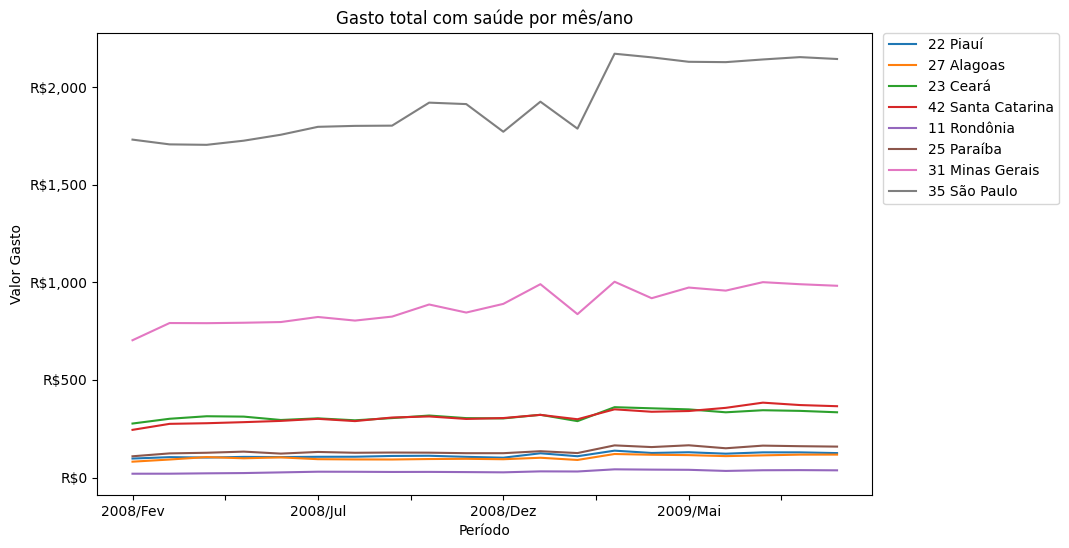

In [109]:
np.random.seed(42)
ordenados_por_total.T.iloc[:20,:].plot(figsize=(10,6))
# Formatação eixo Y
current_values = plt.gca().get_yticks() # Armazena valores do eixo Y
plt.gca().set_yticklabels(['R${:,.0f}'.format(x) for x in current_values]) # Formata e configura rotulo do eixo Y

plt.title('Gasto total com saúde por mês/ano')
plt.legend(bbox_to_anchor=(1.25, 1.015), loc='upper right')
plt.xlabel('Período')
plt.ylabel('Valor Gasto')
plt.show()

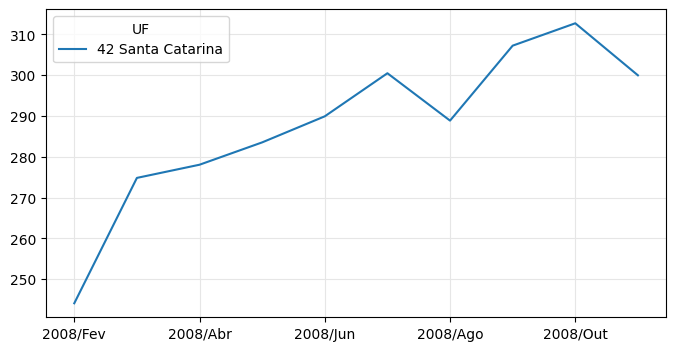

In [110]:
regiao_especifica = ordenados_por_total[ordenados_por_total['Região'] == 'Sul']
regiao_especifica.T.iloc[:10,:].plot(figsize=(8,4))
plt.grid(True, color='0.9')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

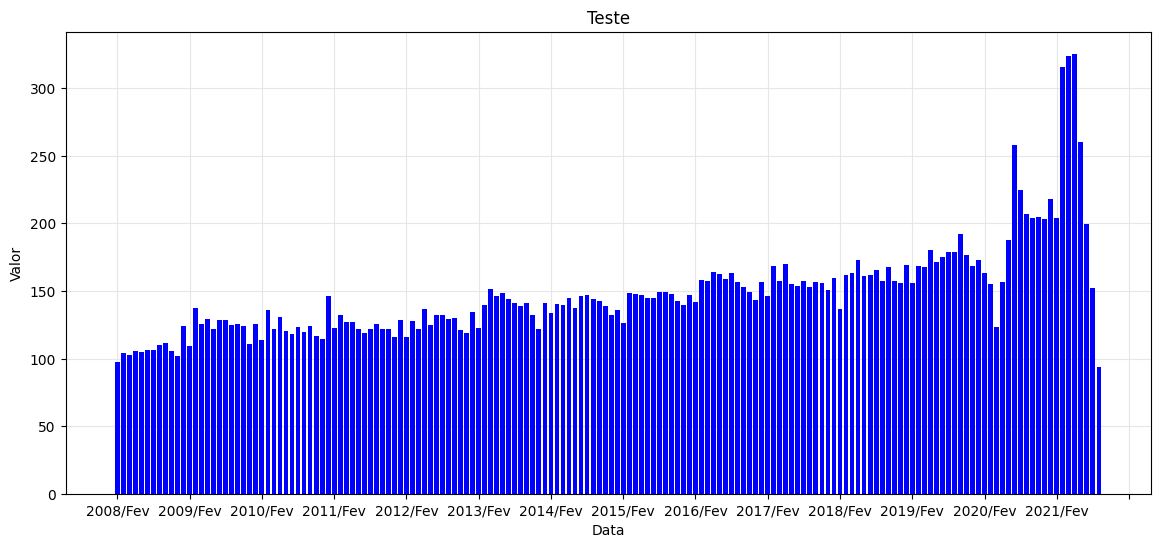

In [111]:
eixo_y = ordenados_por_total.iloc[0][:-1].values
eixo_x = ordenados_por_total.T.iloc[0:-1,:].index.values

fig, ax = plt.subplots(figsize=(14,6))

#ax.plot(eixo_y[:5], eixo_x[:5])
ax.bar(eixo_x,
        eixo_y,
        color='blue')

ax.set(xlabel='Data',
        ylabel='Valor',
        title='Teste')

ax.xaxis.set_major_locator(plt.MultipleLocator(12))
ax.set_axisbelow(True)
plt.grid(True, color='0.9',)
plt.show

#### Desafio 13: Padronizar os ticks verticas para espaçamento de 12 em 12 unidades (uma vez por ano) *ticks verticais = tamanho e dimensão do período do eixo X*
#### Desafio 14: Escolher e utilizar outras cores para personalizar mais o gráfico.
#### Desafio 15: Colocar uma grade (grid) horizontal e vertical que não seja intrusivo. 

In [112]:
mes_mais_recente = ordenados_por_total.columns[-2]
mes_mais_recente

'2021/Set'

<Axes: ylabel='2021/Set'>

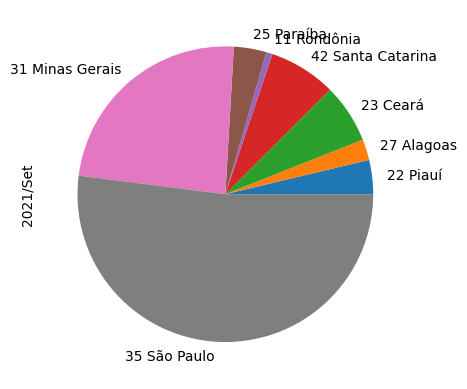

In [113]:
gastos_do_mais_recente = ordenados_por_total[mes_mais_recente]
gastos_do_mais_recente.plot(kind='pie')

#### Dificuldade de identificar elementos.
Qual o maior e menor? Qual é mairo que qual?
Qual a diferença de proporcionalidade?

#### Desafio: O gráfico de pizza acima, está ordenado ou não? Qual o motivo

<Axes: ylabel='2021/Set'>

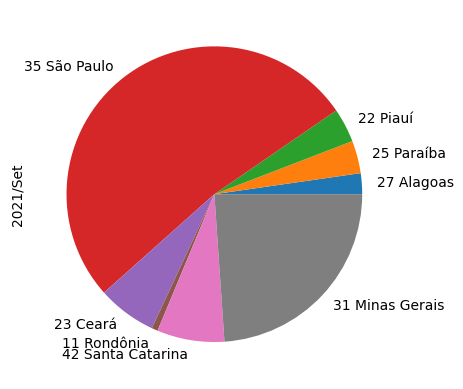

In [114]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

-   Não da para saber a ordem de jeito nenhum.
-   Estamos sendo iludidos em relação as proporções.
-   Cores repetindo pois são muito elementos.
-   Tonalidades estão passando mensagens diferentes.

In [115]:
tabela_de_comparação = gastos_do_mais_recente / gastos_do_mais_recente.loc['35 São Paulo']
tabela_de_comparação

UF
22 Piauí            0.07
27 Alagoas          0.04
23 Ceará            0.12
42 Santa Catarina   0.14
11 Rondônia         0.01
25 Paraíba          0.07
31 Minas Gerais     0.46
35 São Paulo        1.00
Name: 2021/Set, dtype: float64

C:\Users\Gustavo1\AppData\Local\Temp\ipykernel_14656\110897775.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}%'.format(x) for x in eixo_y])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


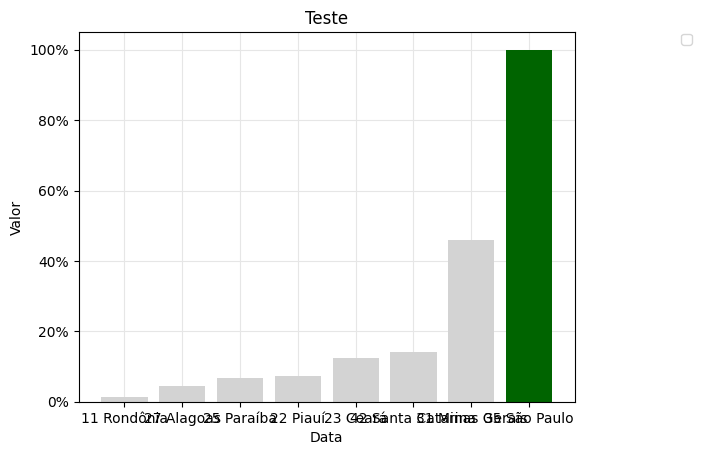

In [188]:
tabela_de_comparação = tabela_de_comparação.sort_values(ascending=True)
eixo_y = tabela_de_comparação.values * 100
eixo_x = tabela_de_comparação.index.values

color = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey','darkgreen']

fig, ax = plt.subplots()

ax.bar(eixo_x,
       eixo_y,
       color=color
)

ax.set(xlabel='Data',
       ylabel='Valor',
       title='Teste'
)

ax.set_axisbelow(True)
eixo_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}%'.format(x) for x in eixo_y]) 
plt.grid(True, color='0.9',)
plt.legend(bbox_to_anchor=(1.25, 1.015), loc='upper right')
plt.show()

In [162]:
tabela_de_comparação.index.values

array(['11 Rondônia', '27 Alagoas', '25 Paraíba', '22 Piauí', '23 Ceará',
       '42 Santa Catarina', '31 Minas Gerais', '35 São Paulo'],
      dtype=object)

#### Desafio: Adicionar uma linha horizontal no seu estado. Anotando o gráfico com uma linha (FEITO)
#### Desafio: Atualizar o último gráfico para refletir seu Estado, incluindo grid, eixos, legenda e rotulso. (FEITO)
#### Desafio: Colorir o seu estado com um tom diferente. Colorir outros Estados de acordo com gasto maior ou menor.
#### Desafio: Gasto por população de dois estados. Escolher dois estados, plotar a comparação desses gasto de acordo com a população deles (base IBGE por exemplo)

In [195]:
ibge_estimativa = pd.read_excel(r'C:\Users\Gustavo1\Documents\Programming_codes\POS-ALURA\FASE 1\A1-analise-exploracao-dados\bases\estimativa_dou_2020.xls', engine='xlrd')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Leitura de dados string para uma tabela moldando no formato CSV

In [197]:
dados_populacao_string = """Posição	Unidade federativa	População	% da pop. total	País comparável

1	 São Paulo	46 649 132	21,9%	 Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)
"""

In [199]:
dados_populacao_io = StringIO(dados_populacao_string)

novos_dados = pd.read_csv(dados_populacao_io, sep='\t')
novos_dados.dropna()
novos_dados.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,1,São Paulo,46 649 132,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 985 284,"7,1%",Chade (14 037 000)
4,5,Paraná,11 597 484,"5,4%",Bolívia (11 410 651)


#### Desafio: Pesquisar a documentação da StringIO (IO)
#### Desafio: Limpar o excel do IBGE com nomes de colunas apropriados e linhas somente representando as unidades federativas
#### Desafio: Ler diretamente da wikipedie a versão HTML